In [ ]:
Sample  Project: prediction 

In [1]:
# Importing the Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read Data set
df=pd.read_excel('D:\Data2\Height_Weight.csv.xlsx')

In [4]:
df.head(21)

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157
5,103,F,47,163
6,127,F,47,153
7,152,F,47,162
8,153,F,47,150
9,155,F,48,163


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
id        199 non-null int64
gender    199 non-null object
weight    199 non-null int64
height    199 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [35]:
#Looking for stastical information about dataframe
df.describe(include='int64')

,id,weight,height
count,199.000000,199.000000,199.000000
mean,100.944724,65.195980,170.587940
std,57.681571,13.008031,8.948848
min,1.000000,39.000000,148.000000
25%,51.500000,55.000000,164.000000
50%,101.000000,63.000000,170.000000
75%,150.500000,73.500000,177.500000
max,200.000000,103.000000,197.000000


In [36]:
# Lookinmg for obejct in dataframe
df.describe(include='object')

,gender
count,199
unique,2
top,F
freq,111


# dropping id cloumn from data frame
df.drop(['id'], axis=1, inplace=True)

In [38]:
#checking for null values in data frame
df.isnull().sum()

gender    0
weight    0
height    0
dtype: int64

In [39]:
#Univariate Analysis
df['gender'].value_counts()

F    111
M     88
Name: gender, dtype: int64

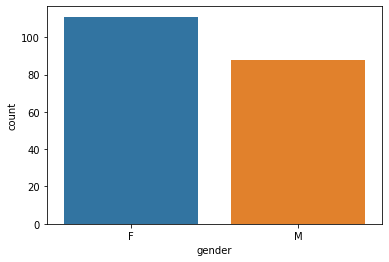

In [40]:
#Plotting the gender value count as bar chart by seaborn module
sns.countplot(x='gender', data=df)

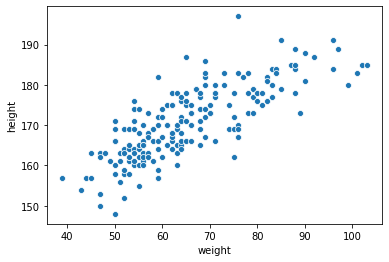

In [42]:
# Drawing sactterplot using sns for weight and height of dataframe
sns.scatterplot(df.weight, df.height)

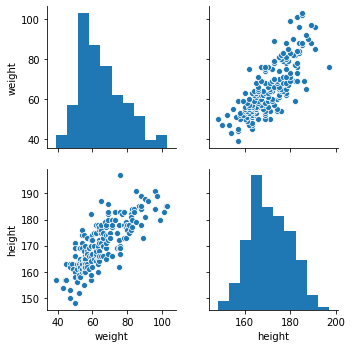

In [44]:
#Drawing pairplot
sns.pairplot(df)

In [43]:
# Plotting the correlation values
df.corr()

,weight,height
weight,1.000000,0.782438
height,0.782438,1.000000


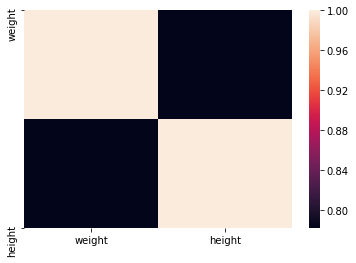

In [45]:
# drwaing heatmap
sns.heatmap(df.corr())

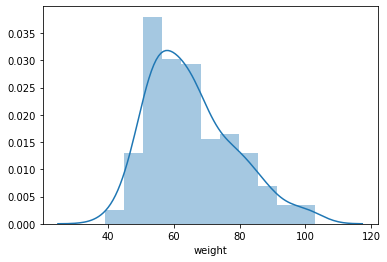

In [46]:
# Drawing distribution plot for weight
sns.distplot(df.weight)

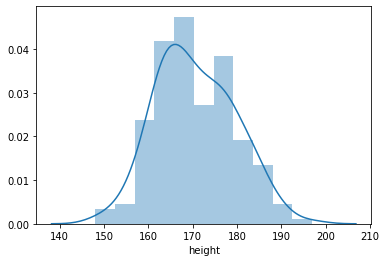

In [47]:
# Distribution plot for height
sns.distplot(df.height)

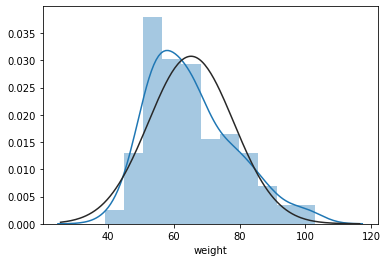

In [49]:
#Fit--->Fitting Distribution to Data from scipy library
from scipy.stats import norm
sns.distplot(df.weight, fit=norm)

In [50]:
# Measuring skewness using scipy
df['weight'].skew()
# The below value 74% is showing the weight data is moderately positively skewed.

0.7449402052268245

In [51]:
df['height'].skew()
# The below vaulue 21% shows the height data is almost symmetric.

0.2129090698591845

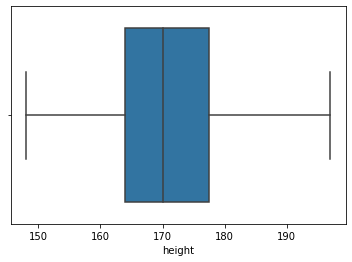

In [52]:
# Checking for outlier detection
sns.boxplot(df.height)


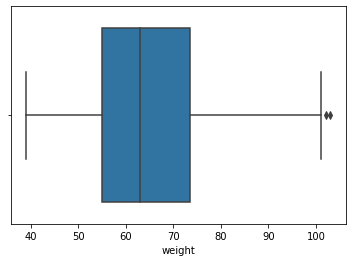

In [53]:
sns.boxplot(df.weight)

In [ ]:
# Using ML technique
# Splitting the data (df) into rainning and test sets(70:30) uing sklearn
# Setting random_state will give the same training & test set each time while running the code

In [55]:
#Creation of dummy variables
df.select_dtypes(include=[np.number]).columns.tolist()

['weight', 'height']

In [64]:
df_num=df[['weight','height']]

In [57]:
#Creating a list of categorical variables
df.select_dtypes(include=['object']).columns.tolist()

['gender']

In [58]:
df_dummies=pd.get_dummies(df['gender'])

In [59]:
df_dummies.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [65]:
# combining column wise, appending of columns
df_combined=pd.concat([df_num, df_dummies], axis=1)

In [66]:
df_combined.head()

,weight,height,F,M
0,39,157,1,0
1,43,154,1,0
2,44,157,1,0
3,45,163,1,0
4,45,157,1,0


In [67]:
#Looking for missing values
df_combined.isnull().sum(axis=0)

weight    0
height    0
F         0
M         0
dtype: int64

In [77]:
#Putting feature variable to X (i.e x=Dataset after removing Intrest Rate)
x = df_combined.drop('weight',axis=1)
#Putting response variable to y
y = df_combined['weight']

In [69]:
x

,height,F,M
0,157,1,0
1,154,1,0
2,157,1,0
3,163,1,0
4,157,1,0
...,...,...,...
194,189,0,1
195,183,0,1
196,185,0,1
197,185,0,1


In [71]:
y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

In [79]:
#Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((139, 3), (139,), (60, 3), (60,))

In [ ]:
# Performing Linear Regression

In [84]:
# Representing LinearRegression as lm
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
# fit the model to the trainning data
lm.fit(x_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Step 5 : Model Evaluation

In [86]:
# print the intercept
print(lm.intercept_)

# The intercept value is in the minus (-.62)

-62.12300300200962


In [88]:
# Let's see the coeeficient
coeff_df = pd.DataFrame(lm.coef_,x_test.columns,columns=['coefficient'])
coeff_df

,coefficient
height,0.747111
F,-4.532026
M,4.532026


In [89]:
# Making predictions using the model
y_pred = lm.predict(x_test)
print(y_pred)

[59.60670945 73.90053672 52.88271157 58.85959857 70.16498234 76.14186935
 75.39475847 55.87115507 54.37693332 57.36537682 79.13031285 76.14186935
 76.14186935 70.91209322 74.6476476  79.13031285 85.10719986 79.87742373
 79.13031285 55.87115507 57.36537682 78.38320198 59.60670945 68.67076059
 59.60670945 66.33070733 75.39475847 63.34226383 82.11875636 76.14186935
 61.84804208 58.1124877  73.15342585 78.38320198 75.39475847 61.84804208
 54.37693332 73.15342585 68.67076059 60.35382033 74.6476476  57.36537682
 58.1124877  82.86586723 54.37693332 49.14715719 50.64137894 53.62982244
 59.60670945 83.61297811 64.83648558 54.37693332 73.90053672 54.37693332
 52.88271157 48.40004631 74.6476476  62.59515295 75.39475847 79.13031285]


In [96]:
# Model Performance Metric
# Coefficient of Determination (R Quare)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
r_squared
# The value of r squared=0.57

0.577972096683651

In [97]:
# Importing the sqrt module from math
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :', mse)
print('Root_Mean_Squared_Error :',rmse)
print('r_square_value:',r_squared)


Mean_Squared_Error : 76.41096541478045
Root_Mean_Squared_Error : 8.741336592008137
r_square_value: 0.577972096683651


In [98]:
df1=pd.DataFrame({'Actual':y_test,'Predicted': y_pred})
df1

,Actual,Predicted
126,68,59.606709
104,64,73.900537
99,63,52.882712
92,62,58.859599
111,65,70.164982
166,79,76.141869
116,65,75.394758
96,62,55.871155
52,55,54.376933
69,58,57.365377


In [ ]:
# Now, Using statmodels & p value

In [105]:
import statsmodels.api as sm
x_train_sm = x_train 
# X_train is assigned to x_train_sm
#Unlike SKLearn, statsmodels dont automatically fit a constant.
# So you need to use the method sm.add_constant(x) in order to add a constant.
x_train_sm = sm.add_constant(x_train_sm)
# Create a fitted model in one line
lm_1 = sm.OLS(y_train, x_train_sm).fit()

#print the coefficients
lm_1.params




const    -41.415335
height     0.747111
F        -25.239693
M        -16.175642
dtype: float64

In [106]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     144.2
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           2.49e-34
Time:                        03:05:33   Log-Likelihood:                -469.85
No. Observations:                 139   AIC:                             945.7
Df Residuals:                     136   BIC:                             954.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.4153     11.415     -3.628      0.0